## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Datasets

In [2]:
data_l = pd.read_csv('labels.csv') 
data_l.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
data_v = pd.read_csv('values.csv') 
data_v.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


## Exploratory Data Analysis

In [4]:
data_v["thal"]=pd.factorize(data_v["thal"])[0]

In [5]:
data=pd.merge(data_l,data_v)

In [6]:
data

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,1,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,1,2,1,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,0,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,1,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,0,124,3,2,1,0,255,0.0,1,48,175,0


# # 1 :Some Basic checks



In [7]:
data.head()  # gives the first five columns of the dataset

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    int64  
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [9]:
data.shape

(180, 15)

## 2:Data Cleaning

In [10]:
# To know the type of variables

data.nunique()

patient_id                              180
heart_disease_present                     2
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64

In [11]:
# Checking for missing values

data.isnull().sum()

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [12]:
# Checking for Duplicate rows


data_dup=data.duplicated().any()
data_dup       ## So here we observe that there are no duplicate rows

False

In [13]:
data.drop(['patient_id'],axis=1,inplace=True)

##  3:Statistical Summary & Visualization

In [14]:
data.describe()


,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,0.500000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,0.583765,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [15]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,1,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,1,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,0,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,1,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,0,124,3,2,1,0,255,0.0,1,48,175,0


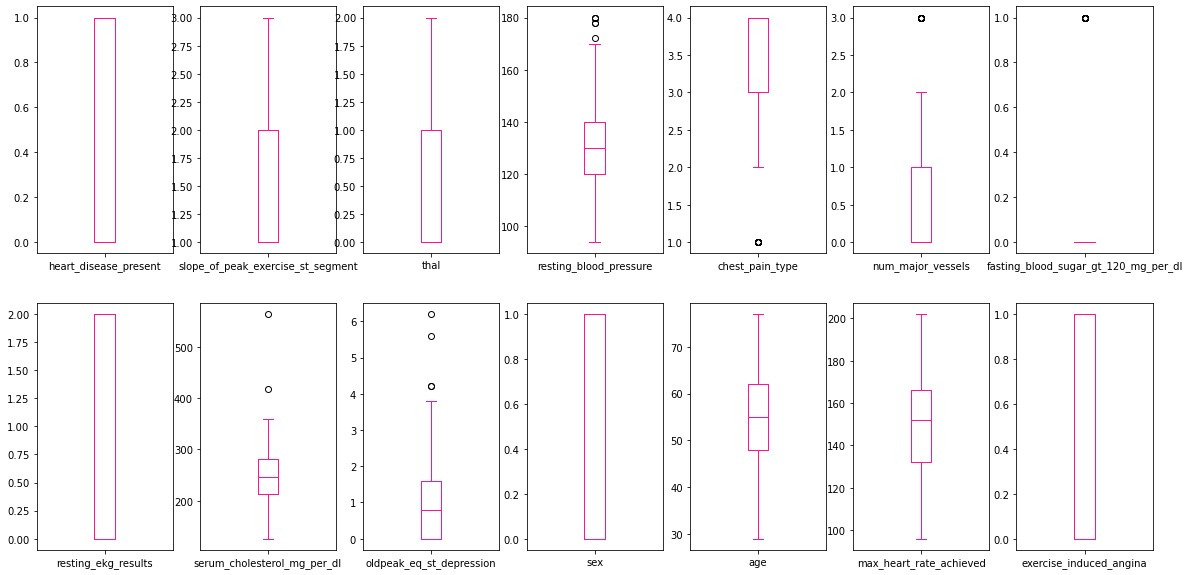

In [16]:
data.plot(kind='box',subplots=True,layout=(2,7),sharex=False,sharey=False,figsize=(20,10),color='deeppink');


##  1 Target variable distribution

In [17]:
print(data.heart_disease_present.value_counts())

0    100
1     80
Name: heart_disease_present, dtype: int64


[Text(0, 0, 'Disease'), Text(1, 0, 'No_Disease')]

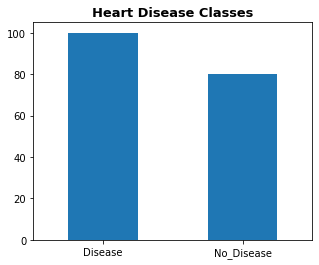

In [18]:
# data['heart_disease_present'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #simple plot
fig, ax=plt.subplots(figsize=(5,4))
name=['Disease','No_Disease']
ax=data.heart_disease_present.value_counts().plot(kind='bar')
ax.set_title('Heart Disease Classes',fontsize=13,weight='bold')
ax.set_xticklabels(name,rotation=0)

## 2 Age Variable distribution 

Text(0.5, 1.0, 'Age Distribution')

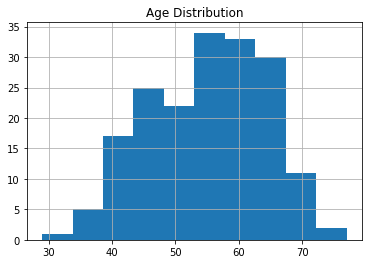

In [19]:
# print(data.age.value_counts())
data['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

54    12
58    10
44     9
64     9
51     9
57     8
60     7
62     7
41     6
67     6
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

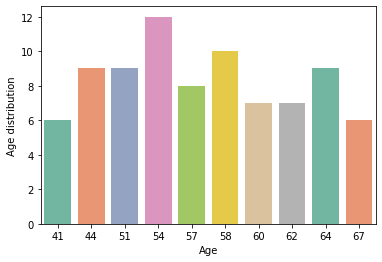

In [20]:
#The Age Variable is normally Distributed,then we analyse the max age from data

#Analyse distribution in age in range 10:
print(data.age.value_counts()[:10])
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values,palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [21]:
#to know the max, min ages who are likely being affected

print(min(data.age))
print(max(data.age))
print(data.age.mean())

29
77
54.81111111111111


## 3 Gender Distribution

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (180).

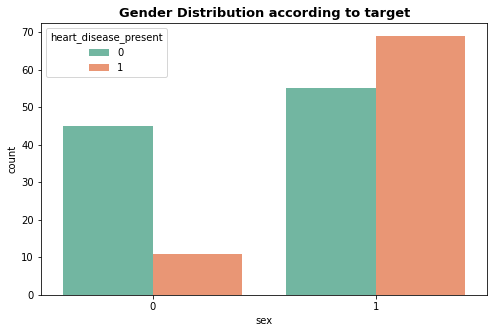

In [37]:
fig, ax=plt.subplots(figsize=(8,5))
name =data['sex']
ax=sns.countplot(x='sex',hue='heart_disease_present',data=data,palette='Set2')
ax.set_title('Gender Distribution according to target',fontsize=13,weight='bold')
ax.set_xticklabels(name,rotation=0)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total=sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.5,i.get_height()-15,str(around((i.get_height()/total)*100,2))+'%',fontsize=14,
           color='white',weight='bold')
plt.tight_layout()

## 4 chest pain type distribution

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (180).

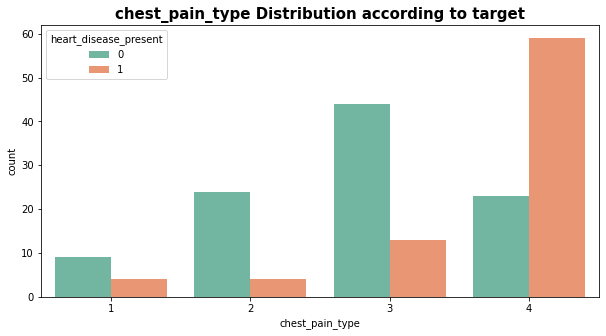

In [38]:
fig, ax=plt.subplots(figsize=(10,5))
name =data['chest_pain_type']
ax=sns.countplot(x='chest_pain_type',hue='heart_disease_present',data=data,palette='Set2')
ax.set_title('chest_pain_type Distribution according to target',fontsize=15,weight='bold')
ax.set_xticklabels(name,rotation=0)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total=sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.5,i.get_height()-15,str(around((i.get_height()/total)*100,2))+'%',fontsize=14,
           color='white',weight='bold')
plt.tight_layout()

##  5 Fbps distribution

NameError: name 'around' is not defined

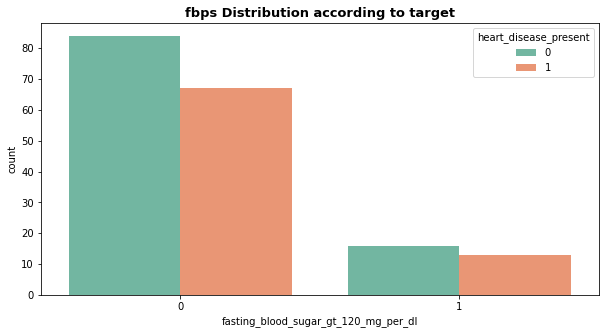

In [39]:
fig, ax=plt.subplots(figsize=(10,5))
name =data['fasting_blood_sugar_gt_120_mg_per_dl']
ax=sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',hue='heart_disease_present',data=data,palette='Set2')
ax.set_title('fbps Distribution according to target',fontsize=13,weight='bold')
#ax.set_xticklabels(name,rotation=0)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())
total=sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.5,i.get_height()-15,str(around((i.get_height()/total)*100,2))+'%',fontsize=14,
           color='white',weight='bold')
plt.tight_layout()

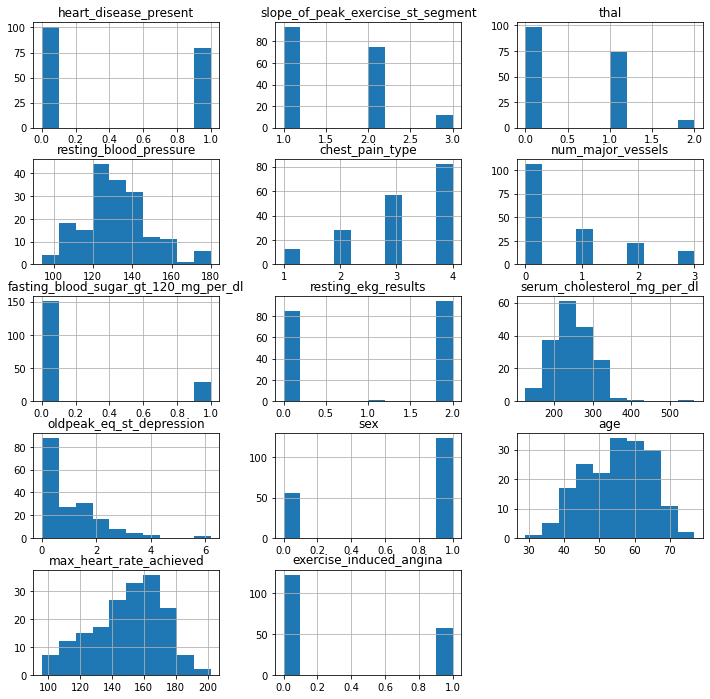

In [40]:
data.hist(figsize=(12,12),layout=(5,3));


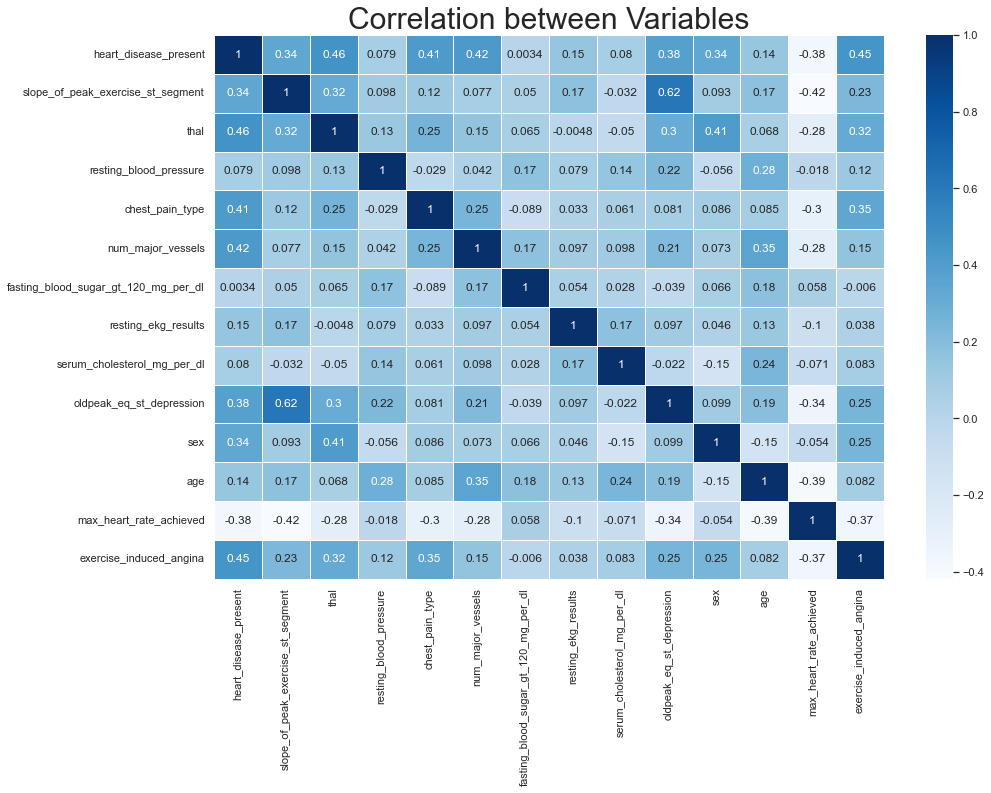

In [41]:
sns.set(style='white')
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap='Blues')
plt.title('Correlation between Variables',fontsize=30)
plt.show()

## Splitting the Data

In [42]:
### Split X and Y
X = data.drop(columns = ['heart_disease_present'])
y = data['heart_disease_present']

In [43]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [44]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [45]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

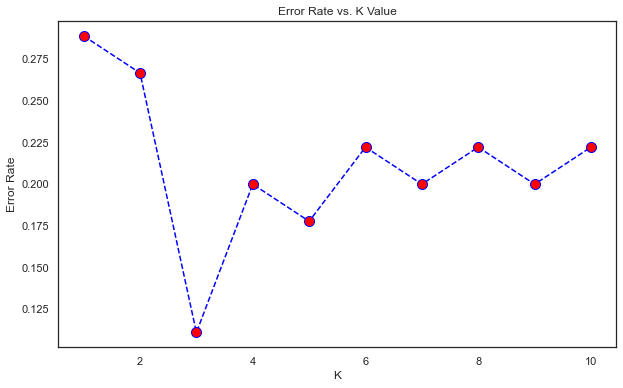

In [46]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5374838498865699
RMSE value for k=  2 is: 0.4281744192888376
RMSE value for k=  3 is: 0.3975231959999626
RMSE value for k=  4 is: 0.39440531887330776
RMSE value for k=  5 is: 0.3977715704047013
RMSE value for k=  6 is: 0.40597390903211356
RMSE value for k=  7 is: 0.40797047601150277
RMSE value for k=  8 is: 0.4149966532662911
RMSE value for k=  9 is: 0.40975753143523946
RMSE value for k=  10 is: 0.4152643067305983
RMSE value for k=  11 is: 0.4207649686717523
RMSE value for k=  12 is: 0.4159252663165509
RMSE value for k=  13 is: 0.40752294498633485
RMSE value for k=  14 is: 0.41032590332414487
RMSE value for k=  15 is: 0.41573970964154905
RMSE value for k=  16 is: 0.41604119721222055
RMSE value for k=  17 is: 0.413627904112333
RMSE value for k=  18 is: 0.40959011262071865
RMSE value for k=  19 is: 0.4037375400320709
RMSE value for k=  20 is: 0.3998610869900807


In [48]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [49]:
# Predict 
y_pred = knn.predict(X_test)

In [50]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.8


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       1.00      0.65      0.79        26

    accuracy                           0.80        45
   macro avg       0.84      0.83      0.80        45
weighted avg       0.86      0.80      0.80        45



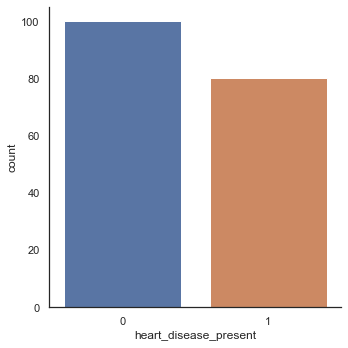

In [52]:
## checking the balance of traget
sns.catplot(x='heart_disease_present',data=data,kind='count')

In [53]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [54]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [55]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.8

In [56]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



In [57]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
heart_disease_present,,
0,19,0
1,8,18


In [58]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat)
f1

0.8181818181818181

In [59]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.375      0.35897436 0.        ]
Cross validation Score: 0.24465811965811968
Std : 0.17312308131992063


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#splitting data

X=data.drop(['heart_disease_present'],axis=1)
y=data['heart_disease_present']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=12)

In [61]:
print(X.shape,X_train.shape,X_test.shape)

(180, 13) (144, 13) (36, 13)


In [62]:
##Model training
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)


In [63]:
model1.predict(X_test)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [64]:
from sklearn.metrics import f1_score,r2_score,classification_report,accuracy_score
print('r2_score', accuracy_score(y_test,prediction1))

r2_score 0.8611111111111112


In [65]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.82      0.88      0.85        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [66]:
pd.crosstab(y_test,prediction1)

col_0,0,1
heart_disease_present,,
0,17,3
1,2,14


In [67]:
# accuracy on training data

X_train_prediction=model1.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)


In [68]:
training_data_accuracy

0.8680555555555556

In [69]:
# accuracy on test data

X_test_prediction=model1.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)


In [70]:
test_data_accuracy

0.8611111111111112

In [71]:
# Building Predictive System

input_data=(1,1,128,2,0,0,2,308,0.0,1,45,170,0)
#change input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape input array as we are predicting for 1 instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model1.predict(input_data_reshaped)

In [72]:
prediction

array([0], dtype=int64)

## CONCLUSION


## SUMMARY